In [1]:
import types
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
import lime
import lime.lime_tabular
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import gaussien as g

(300,)


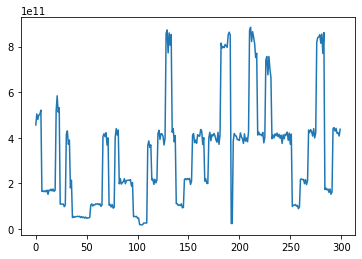

In [2]:
#Irnakat

Y_train = pd.read_csv("Irnakat.csv")["total_energy_consumption"]
print(Y_train.shape)
plt.plot(Y_train)

(116,)


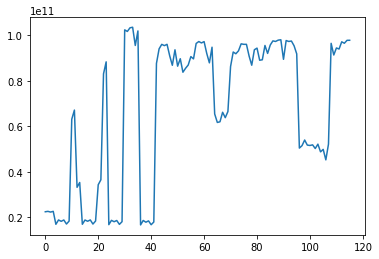

In [9]:
#Liyub
Y_train = pd.read_csv("Liyub.csv")["total_energy_consumption"]
print(Y_train.shape)
plt.plot(Y_train)


(70,)


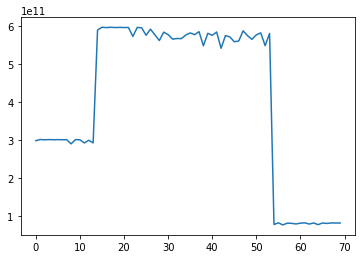

In [4]:
#Hewg
Y_train = pd.read_csv("Hewg.csv")["total_energy_consumption"]
print(Y_train.shape)
plt.plot(Y_train)

(52,)


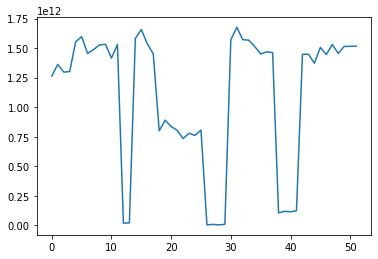

In [13]:
#Glesur
Y_train = pd.read_csv("Glesur.csv")["total_energy_consumption"]
print(Y_train.shape)
plt.plot(Y_train)

On teste avec le profil de Glesur

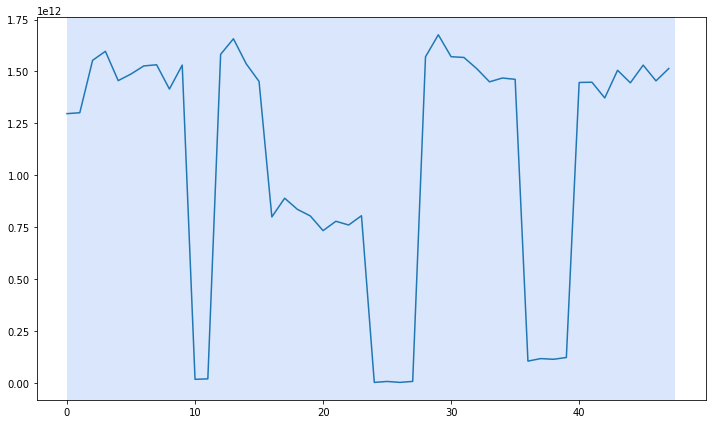

an inform error occurred - "negative state in timeseries"
Not enough point
res {'best': [0, 52]}


In [14]:
#Essayer de repérer des changements significatifs dans le comportement
dic = g.changepoint_detection(Y_train)            
print("res",dic)

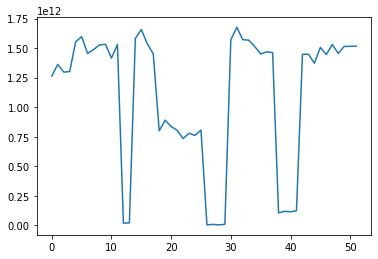

In [15]:
Y_train_arr = [Y_train[dic["best"][i]:dic["best"][i+1]] for i in range(len(dic["best"])-1)]
fig,ax=plt.subplots(1,len(Y_train_arr))
if len(Y_train_arr) > 1 :
    for i in range(len(Y_train_arr)) :
        ax[i].plot(Y_train_arr[i])
else :
    ax.plot(Y_train_arr[0])
plt.show()

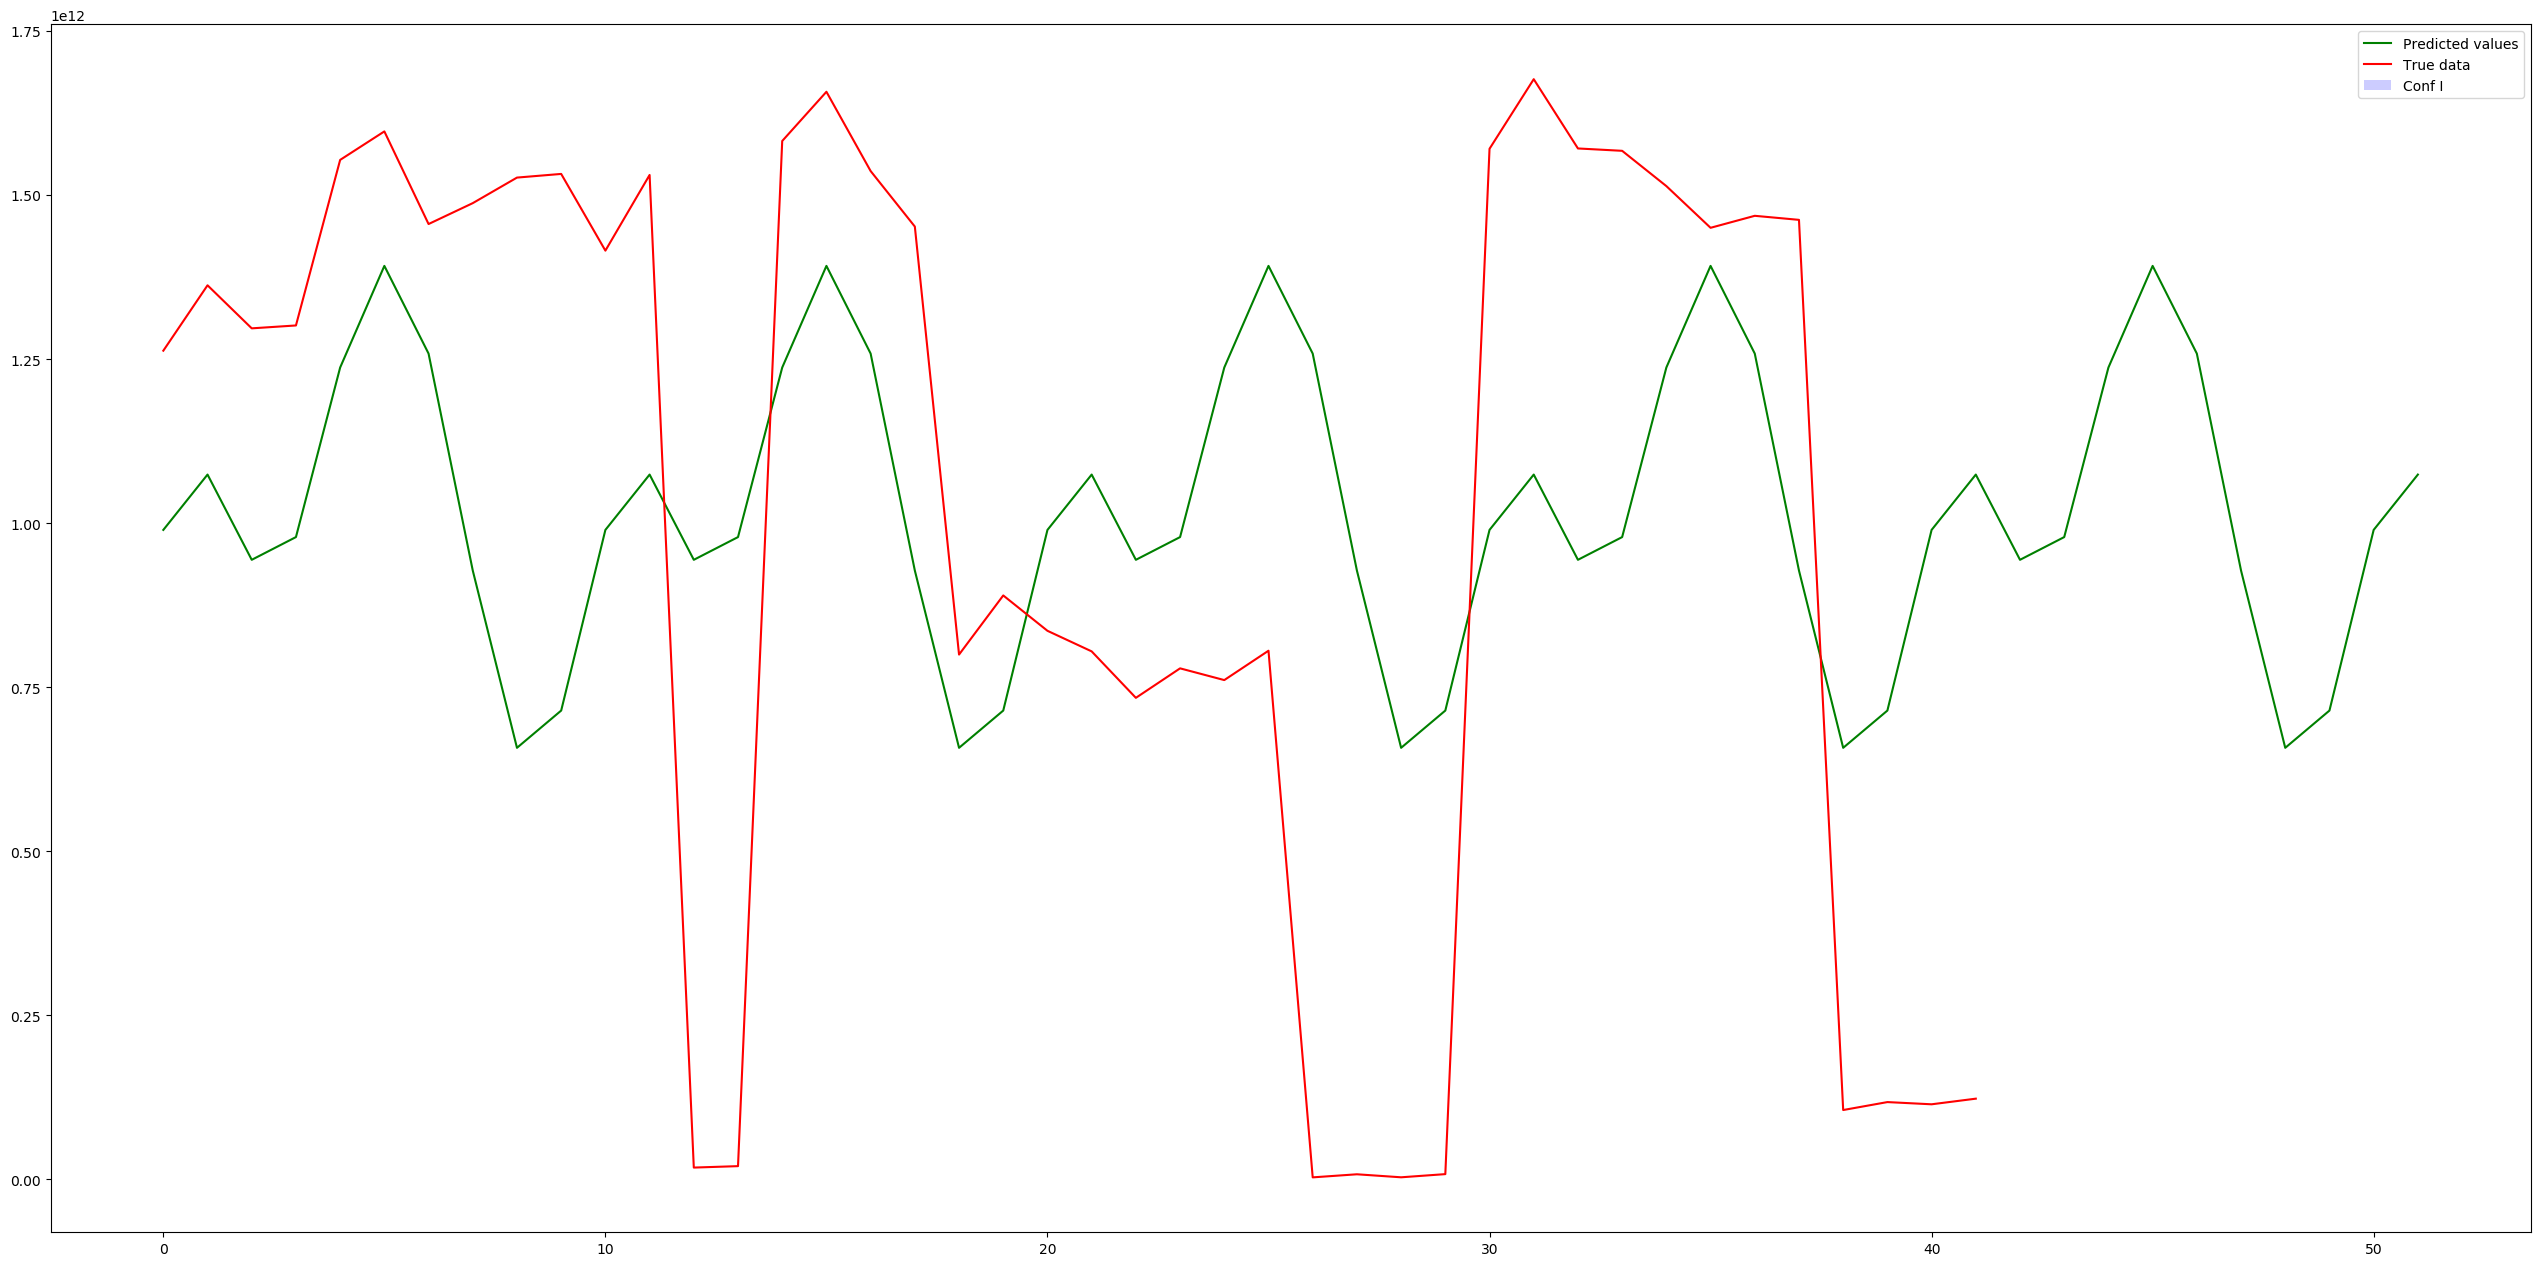

In [16]:
#Regression par défaut
Y_train = Y_train_arr[0]
Y_train,X_train,X_s,Y_test = g.prepare_data(Y_train,split=True,test_percent=0.2)

test_size = len(Y_test)

mu_s, cov_s = g.compute_posterior(X_train,Y_train,X_s,kernel="Periodic",p=10,sigma=10,l=10)
mean,stdp,stdi=g.get_values(mu_s,cov_s,nb_samples=100)
g.plot_gs(Y_train,mean,X_train,X_s,stdp,stdi)
